In [110]:
import cv2
import numpy as np

import torch
from torchvision import transforms

from ultralytics import YOLO

In [118]:
class VideoRead(object):
    """
    Class representing frame by frame video reading 
    """
    def __init__(self, video_path=None, img_resize=640):
        self.video_path = video_path
        self.transforms = transforms.Resize((img_resize, img_resize))
        self.height = None
        self.width = None
        self.fps = None
    
    def get_frames(self):
        """
        Description
        -----------
        Generator function for yielding video frames at each step
        """
        video_capture = cv2.VideoCapture(self.video_path)
        #saving image characteristics
        self.height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        self.width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
        self.fps = video_capture.get(cv2.CAP_PROP_FPS)
        #creating frames generator
        while True:
            ret, frame = video_capture.read()
            #process picture frame
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            tensor_img = torch.from_numpy(rgb_frame).permute(2,0,1).unsqueeze(dim=0).float() / 255.0
            tensor_img = self.transforms(tensor_img)
            #stop yielding when video ends
            if not ret:
                raise StopIteration
            else:
                yield tensor_img

In [243]:
class ModelLoad(object):
    """
    Class representing detection model with pretrained weights
    """
    def __init__(self, confidence=0.3, save_img_flag=False, include_classes=['person']):
        self.model = YOLO("yolo11m.pt")
        self.confidence = confidence
        self.save_img_flag = save_img_flag
        self.include_classes = include_classes
    
    def predict(self, picture):
        prediction = self.model(picture, save=self.save_img_flag, conf=self.confidence)
        detected_objects = []
        for box in prediction[0].boxes:
            conf = float(box.conf[0])
            x1, y1, x2, y2 = box.xyxy[0].to(dtype=torch.int).tolist()
            label = self.model.names[int(box.cls[0])]
            one_tup = ((x1,y1,x2,y2), label, round(conf,2))
            if label in self.include_classes:
                detected_objects.append(one_tup)
            else:
                pass
        return detected_objects


In [ ]:
class ImageRecDrawing(object):
    """
    Class representing prediction drawing on images
    """
    def __init__(self, to_size):
        self.to_size = to_size
    
    def draw(self, prediction):
        pass

In [244]:
model = ModelLoad()

In [186]:
vid_read = VideoRead('/home/luchian/prog/test_assignment/data/crowd.mp4')

In [187]:
frames = vid_read.get_frames()

In [188]:
the_frame = next(frames)

In [189]:
from torchvision.transforms.functional import to_pil_image

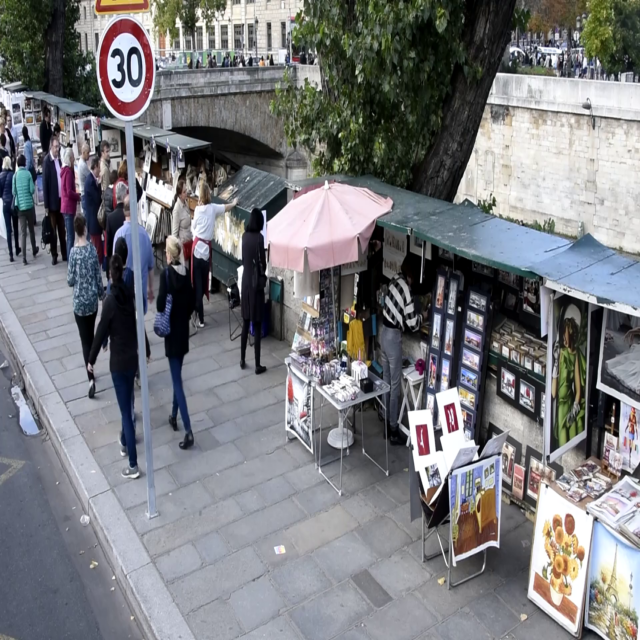

In [190]:
to_pil_image(the_frame.squeeze(dim=0))

In [245]:
results = model.predict(the_frame)
results


0: 640x640 11 persons, 1 umbrella, 1 handbag, 317.0ms
Speed: 0.0ms preprocess, 317.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[((86, 252, 150, 480), 'person', 0.83),
 ((189, 180, 238, 327), 'person', 0.77),
 ((154, 235, 196, 448), 'person', 0.75),
 ((10, 154, 39, 265), 'person', 0.72),
 ((66, 214, 104, 374), 'person', 0.67),
 ((238, 207, 268, 375), 'person', 0.56),
 ((41, 135, 67, 265), 'person', 0.5),
 ((170, 179, 194, 269), 'person', 0.45),
 ((111, 197, 155, 316), 'person', 0.4),
 ((80, 157, 104, 269), 'person', 0.36),
 ((58, 150, 80, 257), 'person', 0.3)]

In [200]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  0., 25.,  0.,  0., 26.,  0.,  0.,  0.,  0.,  0.])
conf: tensor([0.8266, 0.7690, 0.7547, 0.7164, 0.6797, 0.6673, 0.5580, 0.5423, 0.4989, 0.4468, 0.3956, 0.3603, 0.3029])
data: tensor([[8.6461e+01, 2.5240e+02, 1.5075e+02, 4.8039e+02, 8.2660e-01, 0.0000e+00],
        [1.8998e+02, 1.8082e+02, 2.3868e+02, 3.2708e+02, 7.6900e-01, 0.0000e+00],
        [1.5462e+02, 2.3511e+02, 1.9629e+02, 4.4893e+02, 7.5470e-01, 0.0000e+00],
        [1.0256e+01, 1.5497e+02, 3.9629e+01, 2.6547e+02, 7.1642e-01, 0.0000e+00],
        [2.6583e+02, 1.7911e+02, 3.9374e+02, 2.7538e+02, 6.7973e-01, 2.5000e+01],
        [6.6661e+01, 2.1424e+02, 1.0485e+02, 3.7482e+02, 6.6728e-01, 0.0000e+00],
        [2.3881e+02, 2.0709e+02, 2.6848e+02, 3.7551e+02, 5.5801e-01, 0.0000e+00],
        [1.5303e+02, 2.6691e+02, 1.7355e+02, 3.3792e+02, 5.4234e-01, 2.6000e+01],
        [4.1690e+01, 1.3530e+02, 6.7469e+01, 2.6591e+02, 4.9889e-01, 0.0000e+00],


In [178]:
ii, boxx = None,None
for i, box in enumerate(results[0].boxes):
    ii, boxx = i, box
    break

In [180]:
boxx

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8266])
data: tensor([[ 86.4615, 252.3957, 150.7515, 480.3931,   0.8266,   0.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[118.6065, 366.3944,  64.2901, 227.9974]])
xywhn: tensor([[0.1853, 0.5725, 0.1005, 0.3562]])
xyxy: tensor([[ 86.4615, 252.3957, 150.7515, 480.3931]])
xyxyn: tensor([[0.1351, 0.3944, 0.2355, 0.7506]])

In [ ]:
class ModelLoad(object):
    """
    Class representing detection model with pretrained weights
    """
    def __init__(self):
        self.ret = 0